<a href="https://colab.research.google.com/github/Maxie503/CampusX-100Days-of-DL/blob/main/Day22_Early_Stopping_In_Neural_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import numpy as no
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap

<Axes: >

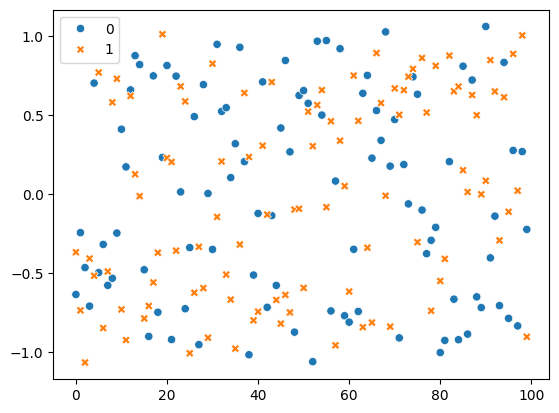

In [4]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
sns.scatterplot(X)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
hist = model.fit(X_train,y_train,epochs=1200,verbose=0,validation_data=(X_test,y_test))

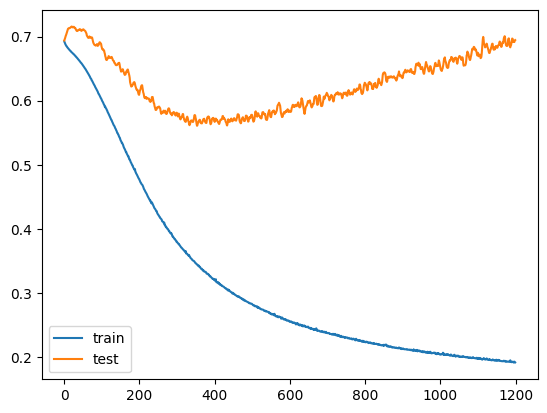

In [10]:
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

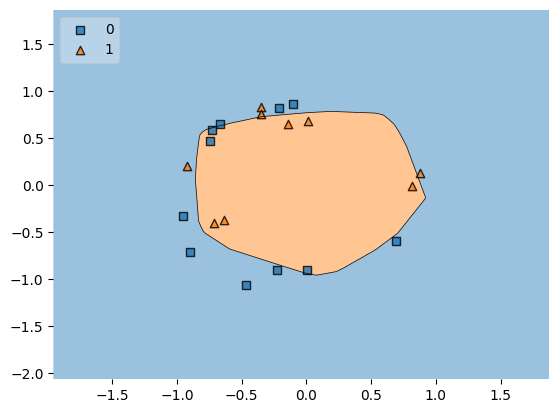

In [11]:
plot_decision_regions(X_test,y_test,clf=model,legend=2)

In [50]:
# Early Stopping

In [12]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
callback = EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=75,
                         verbose=1,mode='auto',restore_best_weights=True)

In [15]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=[callback])

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.7062
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5383 - loss: 0.6932 - val_accuracy: 0.3500 - val_loss: 0.7074
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5641 - loss: 0.6875 - val_accuracy: 0.3500 - val_loss: 0.7098
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5562 - loss: 0.6874 - val_accuracy: 0.3500 - val_loss: 0.7102
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5508 - loss: 0.6881 - val_accuracy: 0.3500 - val_loss: 0.7109
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5289 - loss: 0.6886 - val_accuracy: 0.3500 - val_loss: 0.7114
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5641 - loss: 0.6844 - val_accuracy: 0.3500 - val_loss: 0.7121
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5578 - loss: 0.6810 - val_accuracy: 0.3500 - 

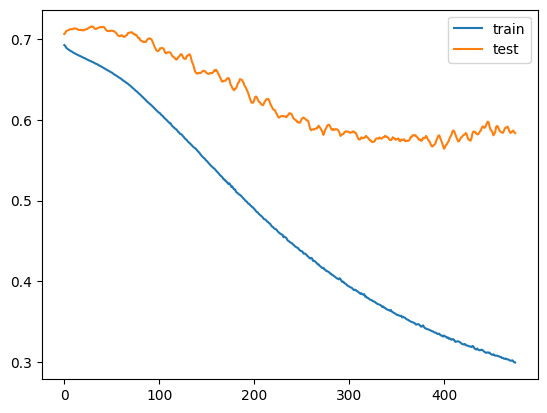

In [16]:
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


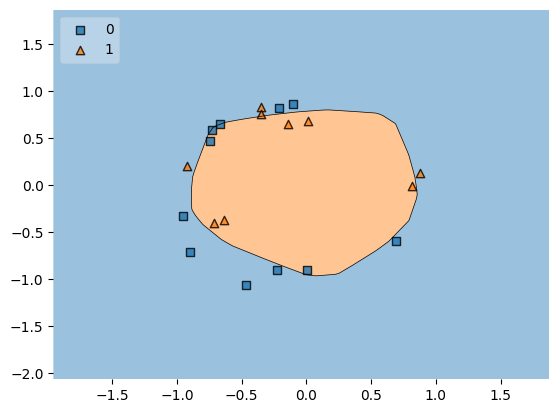

In [17]:
plot_decision_regions(X_test,y_test,clf=model,legend=2)
plt.show()